Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


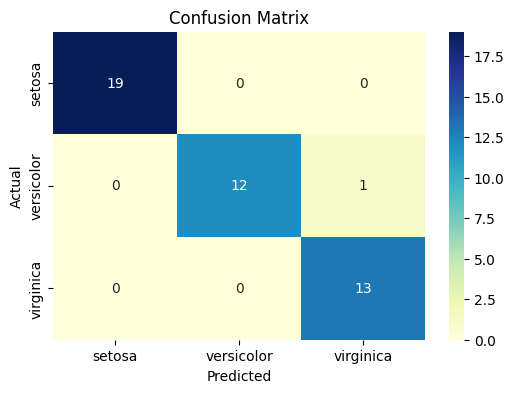

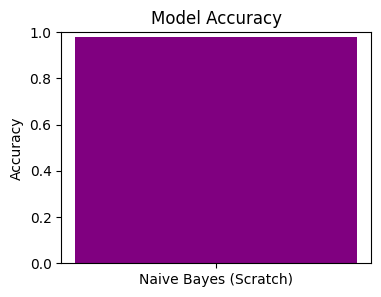

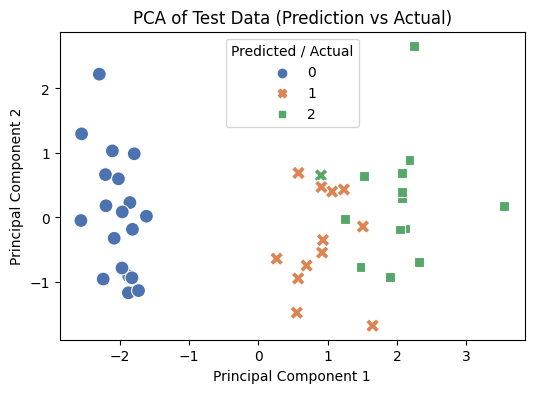

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load dataset
data = datasets.load_iris()
X = data.data
y = data.target
labels = data.target_names

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes from scratch
class NaiveBayesScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-9  # add small value to prevent divide-by-zero
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            class_conditional = np.sum(np.log(self._pdf(c, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

# Train and predict
model = NaiveBayesScratch()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Evaluation ---
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=labels)
conf_mat = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy:", acc)

# --- Visualization ---

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy Bar Plot
plt.figure(figsize=(4, 3))
plt.bar(['Naive Bayes (Scratch)'], [acc], color='purple')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# PCA 2D Plot (Predicted vs Actual)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, style=y_test, palette='deep', s=100)
plt.title('PCA of Test Data (Prediction vs Actual)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Predicted / Actual")
plt.show()
